In [20]:
import os 
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fs = 2000 #sampling 주파수
n_seconds = 2 #simulation 지속시간
times = times = np.arange(0, n_seconds, 1/fs) #시간 백터

# DSP data
data1 = np.load('../Codes/data_sine_wave.npy')
data2 = np.load('../Codes/data_signal.npy')
data3 = np.load('../Codes/data_signal_with_sine.npy')

print(f"Shape of data1: {data1.shape}")

Shape of data1: (1000, 4000)


Text(0.5, 1.0, 'Simulate signal with artifact')

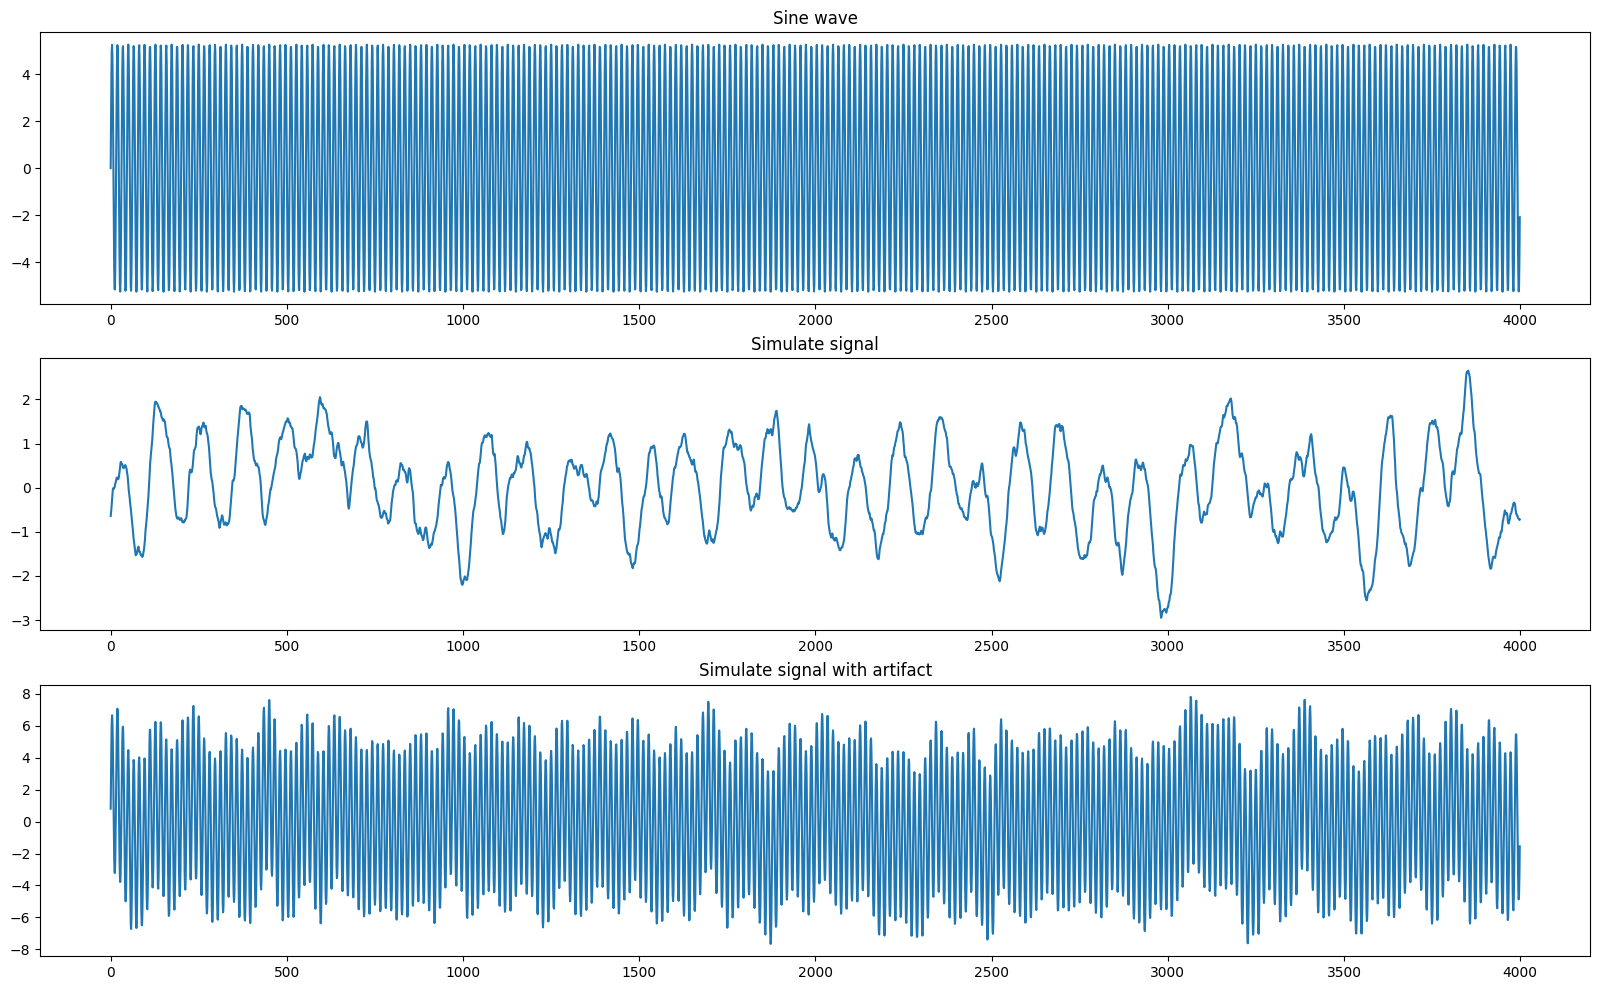

In [21]:
###### Origin #####
plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(data1[1,:], label='Sine wave')
plt.title('Sine wave')

plt.subplot(3,1,2)
plt.plot(data2[1,:], label='Simulate signal')
plt.title('Simulate signal')

plt.subplot(3,1,3)
plt.plot(data3[1,:], label='Simulate signal with artifact')
plt.title('Simulate signal with artifact')

In [22]:
###### On-Off set version1; regular pattern #####
# 2 sec = 4000 <=> 1 sec = 2000, 100 = 0.05 sec
off_range = 100

# 패턴 생성
pattern = np.zeros(len(times))

for i in range(0, len(times), off_range*2):
    pattern[i:i+off_range] = 1

set_pattern = pattern.astype(int)

# sine wave * set_pattern
data1_2 = data1.copy()
for i in range(len(data1[:, 1])):
    data1_2[i, :] *= set_pattern

In [30]:
###### On-Off set version2; Non-regular pattern #####
# 2 sec = 4000 <=> 1 sec = 2000, 100 = 0.05 sec
off_range = 100
num_off_set = 20 # off block 갯수

# 패턴 생성
pattern = np.zeros(len(times))
points = np.arange(0, len(times) - off_range +1, off_range) # 시작점 범위
selected_points = np.random.choice(points, num_off_set, replace = False) # 겹치지 않게 선택

if len(selected_points) < num_off_set:
    raise ValueError("num_off_set이 available_points보다 큽니다. off_range를 줄이거나 num_off_set를 줄이세요.")

for i in selected_points:
    pattern[i:i+off_range] = 1

set_pattern = pattern.astype(int)

# sine wave * set_pattern
data1_3 = data1.copy()
for i in range(len(data1[:, 1])):
    data1_3[i, :] *= set_pattern

# num_ones = np.count_nonzero(set_pattern == 1)
# num_zeros = np.count_nonzero(set_pattern == 0)

# print(f"Number of ones: {num_ones}")
# print(f"Number of zeros: {num_zeros}")


Number of ones: 2000
Number of zeros: 2000


Text(0.5, 1.0, 'Sine wave + onoffset v2')

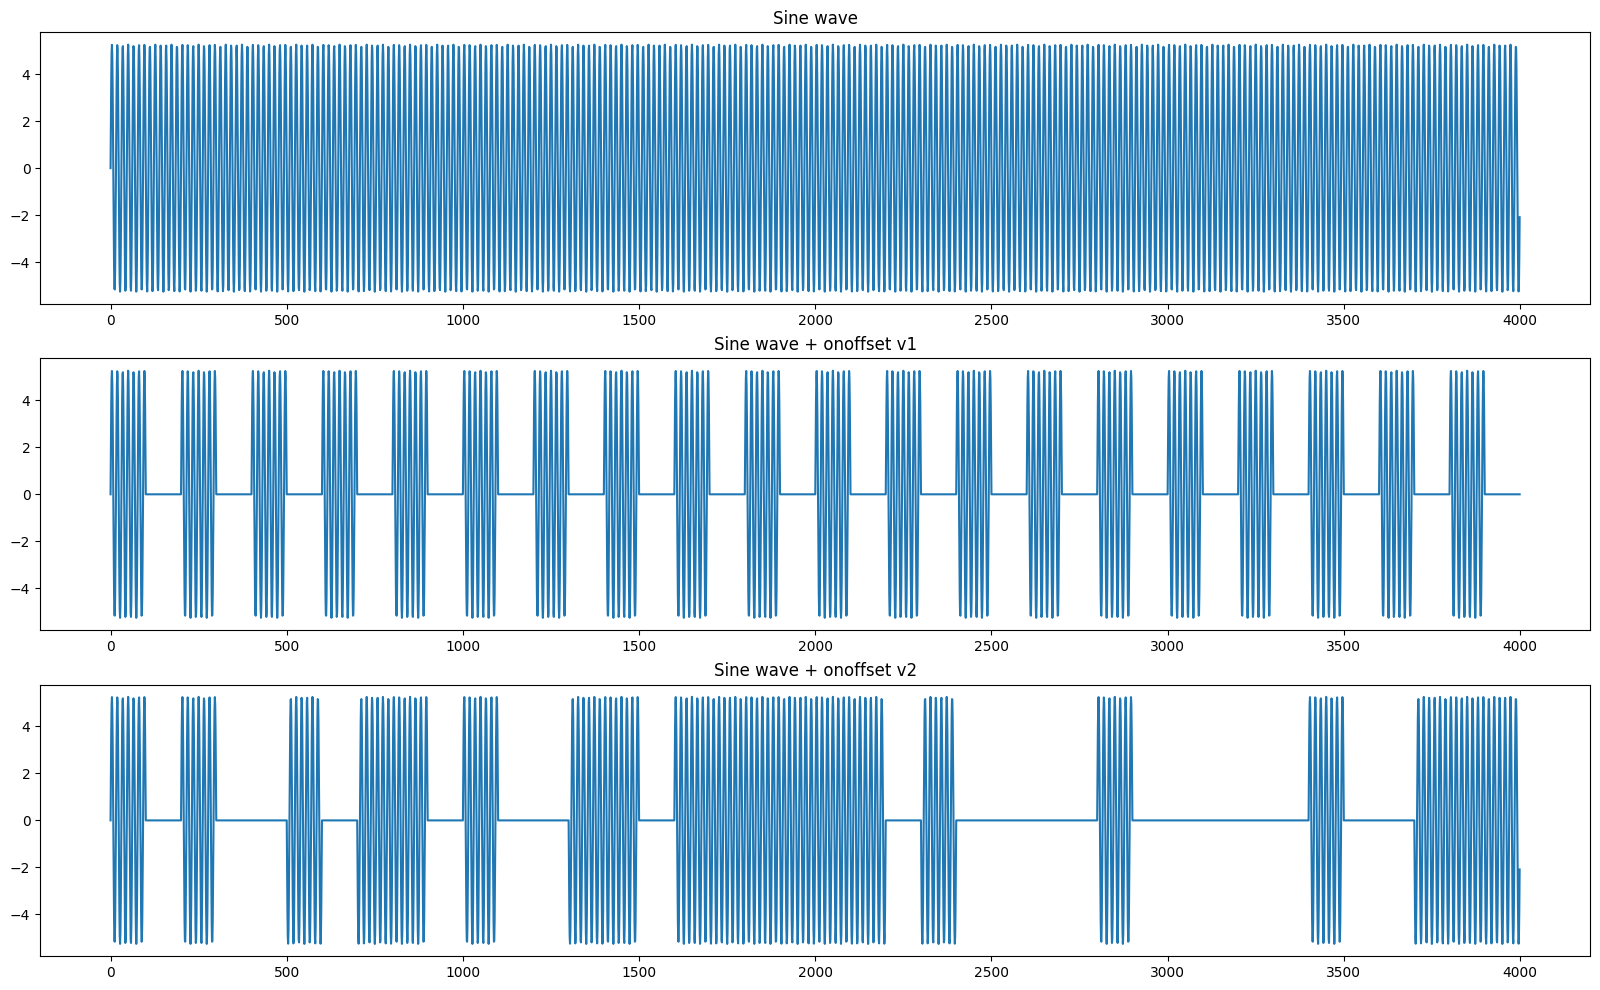

In [31]:
###### Add an On-Off set #####
plt.figure(figsize=(20, 12))

plt.subplot(3,1,1)
plt.plot(data1[1,:], label='Sine wave')
plt.title('Sine wave')

plt.subplot(3,1,2)
plt.plot(data1_2[1,:], label='Sine wave + onoffset v1')
plt.title('Sine wave + onoffset v1')

plt.subplot(3,1,3)
plt.plot(data1_3[1,:], label='Sine wave + onoffset v2')
plt.title('Sine wave + onoffset v2')
